Korišćen dataset [Tennis Major Tournament Match Statistics] (http://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics?fbclid=IwAR0iXnL0Dkk1J5HxlFvhqWJn_tPJ02eHcYWCHmf5KHjdeFJbCS-7yKjpCLU) predstavlja kolekciju od 8 data setova, po dva seta podataka za svaki grend slem turnir, gde jedan predstavlja podatke za musku konkurenciju, a drugi podatke za zensku konkurenciju. Svaki dataset ima najmanje 76 reda, svaki sa po 42 kolone. Postoje 126 instanci sa 42 atributa. Potrebno je naci prosecne vrednosti statistika potrebne za pobedu u jednom teniskom mecu. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
full_dataset = pd.read_csv('DataSets/AusOpen-men-2013.csv')
data = full_dataset.fillna(0, inplace=True)
full_dataset

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,1,0,0,3,61,35,39,18,...,4,8,8.0,9.0,101,6,7.0,6.0,0.0,0.0
1,Leonardo Mayer,Albert Montanes,1,1,3,0,61,31,39,13,...,0,0,0.0,0.0,42,1,3.0,1.0,0.0,0.0
2,Marcos Baghdatis,Denis Istomin,1,0,0,3,52,53,48,20,...,4,13,12.0,16.0,126,6,7.0,6.0,0.0,0.0
3,Dmitry Tursunov,Michael Russell,1,1,3,0,53,39,47,24,...,1,7,0.0,0.0,79,2,2.0,3.0,0.0,0.0
4,Juan Monaco,Ernests Gulbis,1,0,1,3,76,63,24,12,...,3,5,16.0,28.0,127,1,6.0,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Andy Murray,Roger Federer,5,0,1,3,61,60,39,28,...,4,17,49.0,66.0,147,6,6.0,6.0,6.0,0.0
122,Rafael Nadal,Grigor Dimitrov,5,1,3,1,73,66,27,22,...,3,6,28.0,41.0,132,6,6.0,6.0,2.0,0.0
123,Tomas Berdych,Stanislas Wawrinka,6,0,1,3,62,71,38,30,...,1,4,14.0,18.0,143,6,6.0,7.0,7.0,0.0
124,Rafael Nadal,Roger Federer,6,1,3,0,65,41,35,22,...,1,2,23.0,42.0,86,6,3.0,3.0,0.0,0.0


Na prethodnoj slici se može videti tabelarni prikaz podataka sa US Opena svih tenisera koji su učestvovali u svakom kolu.
U delu koji sledi prikazano je spajanje relevantnih podataka u jedan dataset(tabelu) igrača koji su odneli pobedu u meču. Podaci su filtrirani na osnovu kolone result, koja jednoznačno određuje pobednika, gde vrednost 1 predstavlja pobedu prvonavedenog tenisera, a vrednost nula drugog. 

In [3]:
mask_first_player_win = full_dataset['Result'] == 1
mask_second_player_win = full_dataset['Result'] == 0

df_first_player_win = pd.DataFrame(full_dataset[mask_first_player_win])
df_second_player_win = pd.DataFrame(full_dataset[mask_second_player_win]) 

df_first_player_win = df_first_player_win.iloc[:,6:19]
df_second_player_win = df_second_player_win.iloc[:,24:37]

df_formatted_2 = df_second_player_win.rename(columns={"FSP.2": "FSP", "FSW.2": "FSW", "SSP.2": "SSP", 
                   "SSW.2": "SSW", "ACE.2": "ACE", "DBF.2": "DBF", 
                   "WNR.2": "WNR", "UFE.2": "UFE", "BPC.2": "BPC", 
                   "BPW.2": "BPW", "NPA.2": "NPA", "NPW.2": "NPW",
                   "TPW.2": "TPW"})

df_formatted_1 = df_first_player_win.rename(columns={"FSP.1": "FSP", "FSW.1": "FSW", "SSP.1": "SSP", 
                    "SSW.1": "SSW", "ACE.1": "ACE", "DBF.1": "DBF", 
                   "WNR.1": "WNR", "UFE.1": "UFE", "BPC.1": "BPC", 
                   "BPW.1": "BPW", "NPA.1": "NPA", "NPW.1": "NPW",
                   "TPW.1": "TPW"})

frames = [df_formatted_1, df_formatted_2]

df_result = pd.concat(frames)

df_result

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW
1,61,31,39,13,13,1.0,13,1,7,14,0.0,0.0,80
3,53,39,47,24,8,6.0,8,6,6,9,0.0,0.0,104
7,47,18,53,15,3,4.0,21,31,6,20,6.0,9.0,78
9,77,76,23,11,6,4.0,6,4,7,24,0.0,0.0,162
11,57,62,43,43,13,0.0,50,38,6,18,15.0,19.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,63,55,37,24,3,1.0,64,43,9,19,19.0,27.0,153
115,57,42,43,25,7,1.0,43,21,3,7,34.0,41.0,100
121,64,61,36,28,10,0.0,54,42,4,17,49.0,66.0,147
123,61,72,39,32,18,4.0,57,49,1,4,14.0,18.0,143


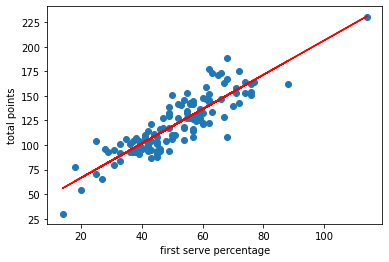

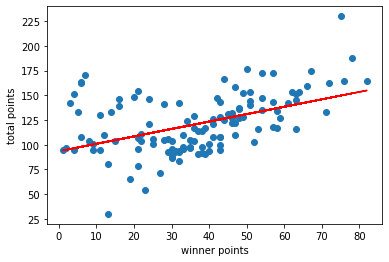

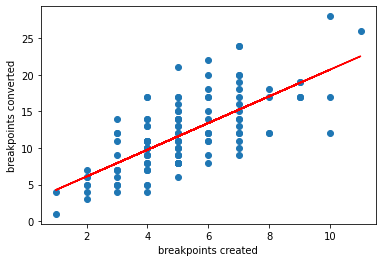

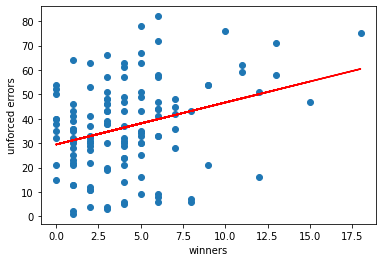

In [10]:
#first serve/totals
X1 = df_result.iloc[:, 1].values.reshape(-1, 1) # first serve percentage
Y1 = df_result.iloc[:, 12].values.reshape(-1, 1) # total points
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)
Y_pred = linear_regressor.predict(X1)

plt.scatter(X1, Y1)
plt.plot(X1, Y_pred, color='red')
plt.xlabel("first serve percentage")
plt.ylabel("total points")
plt.show()

# winner/totals
X2 = df_result.iloc[:, 6].values.reshape(-1, 1) # winner points
Y2 = df_result.iloc[:, 12].values.reshape(-1, 1) # total points
linear_regressor = LinearRegression()
linear_regressor.fit(X2,Y2)
Y_pred = linear_regressor.predict(X2)

plt.scatter(X2, Y2)
plt.plot(X2, Y_pred, color='red')
plt.xlabel("winner points")
plt.ylabel("total points")
plt.show() 

# breakpoint created/converted percentage
X3 = df_result.iloc[:, 8].values.reshape(-1, 1) # breakpoints created
Y3 = df_result.iloc[:, 9].values.reshape(-1, 1) # breakpoints converted
linear_regressor = LinearRegression()
linear_regressor.fit(X3,Y3)
Y_pred = linear_regressor.predict(X3)

plt.scatter(X3, Y3)
plt.plot(X3, Y_pred, color='red')
plt.xlabel("breakpoints created")
plt.ylabel("breakpoints converted")
plt.show() 

# winners/unforced errors
X4 = df_result.iloc[:, 5].values.reshape(-1, 1) # winners 
Y4 = df_result.iloc[:, 6].values.reshape(-1, 1) # unforced errors
linear_regressor = LinearRegression()
linear_regressor.fit(X4,Y4)
Y_pred = linear_regressor.predict(X4)

plt.scatter(X4, Y4)
plt.plot(X4, Y_pred, color='red')
plt.xlabel("winners")
plt.ylabel("unforced errors")
plt.show() 

Na prvom grafiku se može videti odnos ukupnog broja osvojenih poena(y-osa) i procenta ubačenog prvog servisa(x-osa) po čemu se može zaključiti da što je veći procenat ubačenog prvog servisa, to je veći broj osvojenih poena. 
Na drugom grafiku se može videti odnos ukupnog broja osvojenih poena(y-osa) i vinera(x-osa).
Na trećem grafiku se može videti odnos kreiranih brejk šansi (y-osa) i napravljenih brejkova(x-osa).
Na četvrtom grafiku se može videti odnos ukupnog broja neiznuđenih grešaka(y-osa) i vinera(x-osa).

In [11]:
df_result.describe(include = "all")

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,62.230159,51.031746,37.769841,22.698413,11.071429,4.111111,36.523810,29.873016,5.134921,11.833333,12.801587,17.761905,120.833333
std,7.045183,14.942523,7.045183,8.806606,6.926100,3.335199,18.558325,19.481267,1.965108,5.062410,9.780814,13.501661,29.701650
min,46.000000,14.000000,17.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,30.000000
25%,58.000000,40.250000,34.000000,17.000000,6.000000,2.000000,24.000000,14.000000,4.000000,8.000000,5.250000,9.000000,97.250000
50%,62.000000,50.000000,38.000000,22.000000,9.000000,4.000000,36.000000,28.000000,5.000000,11.000000,12.000000,16.000000,117.000000
75%,66.000000,60.000000,42.000000,27.750000,15.000000,6.000000,48.000000,44.500000,6.000000,15.000000,18.750000,25.750000,142.000000
max,83.000000,114.000000,54.000000,57.000000,34.000000,18.000000,82.000000,79.000000,11.000000,28.000000,49.000000,66.000000,230.000000


Na prethodnoj slici se mogu videti rezultati distribucije podataka. Drugi i treći red predstavljaju Gausovu distribuciju, prosečne vrednosti relevantnih parametara o igri pobednika i standardne devijacije(odstupanja od prosečnih) istih.

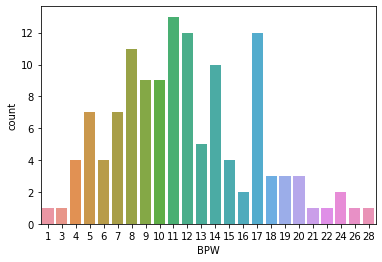

In [182]:
sns.countplot(x=df_result['BPW'], label="Break points won")
plt.show()

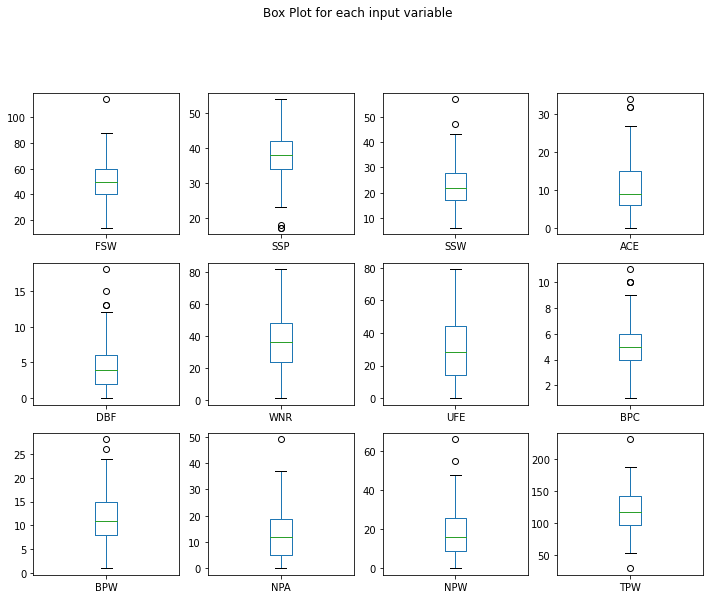

In [183]:
df_result.drop('FSP', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12), 
                                        title='Box Plot for each input variable')
plt.savefig('Input box')
plt.show()

Na prethodnim graficima se mogu videti takozvani boxplot-ovi koji predstavlja disperziju(raspodelu) podataka gde se mogu videti i prepoznati outlier-i koji se nalaze iznad i ispod horizontalnih crta.

U sledećem delu biće kreirani training i testing setovi, u odnosu 70-30, kojim će se u narednom delu pokazati efikasnost algoritama u zaključivanju pobednika(predikcija Result-a) na osnovu relevantnih parametara.

In [14]:
list_of_x_cols = ["FSP.2", "FSP.1", "FSW.2", "FSW.1", "SSP.2", "SSP.1", 
                   "SSW.2", "SSW.1", "ACE.2", "ACE.1", "DBF.2", "DBF.1", 
                   "WNR.2", "WNR.1", "UFE.2", "UFE.1", "BPC.2", "BPC.1", 
                   "BPW.2", "BPW.1", "NPA.2", "NPA.1", "NPW.2", "NPW.1", 'TPW.1', 'TPW.2']
y_col = 'Result';
X_train, X_test, y_train, y_test = train_test_split(full_dataset[list_of_x_cols], full_dataset[y_col], test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Efikasnost logističke regresije na skupu trening podataka: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Efikasnost logističke regresije na skupu trening podataka: {:.2f}'
     .format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost logističke regresije na skupu trening podataka: 0.99
Efikasnost logističke regresije na skupu trening podataka: 0.87
[[16  3]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.85      0.89      0.87        19

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



In [37]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('Efikasnost decision tree algoritma na skupu trening podataka: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Efikasnost decision tree algoritma na skupu test podataka: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost decision tree algoritma na skupu trening podataka: 1.00
Efikasnost decision tree algoritma na skupu test podataka: 0.82
[[18  1]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.93      0.68      0.79        19

    accuracy                           0.82        38
   macro avg       0.84      0.82      0.81        38
weighted avg       0.84      0.82      0.81        38



In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Efikasnost KNN algoritma na skupu trening podataka: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Efikasnost KNN algoritma na skupu test podataka: {:.2f}'
     .format(knn.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost KNN algoritma na skupu trening podataka: 0.93
Efikasnost KNN algoritma na skupu test podataka: 0.82
[[16  3]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.83      0.79      0.81        19

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38



In [41]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred = lda.predict(X_test)
print('Efikasnost LDA algoritma na skupu trening podataka: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Efikasnost LDA algoritma na skupu test podataka: {:.2f}'
     .format(lda.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost LDA algoritma na skupu trening podataka: 0.98
Efikasnost LDA algoritma na skupu test podataka: 0.95
[[18  1]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print('Efikasnost GNB algoritma na skupu trening podataka: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Efikasnost GNB algoritma na skupu test podataka: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost GNB algoritma na skupu trening podataka: 0.92
Efikasnost GNB algoritma na skupu test podataka: 0.82
[[15  4]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.80      0.84      0.82        19

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38



Sklanjamo outlier-e, čime se eliminiše 24 reda i ostaju nam 102. Primenom algoritama koje smo prethodno primenili, možemo da vidimo da neki bolje reaguju na veću količinu podataka i pored outlier-a

In [61]:
list_of_x_cols = ["FSP.2", "FSP.1", "FSW.2", "FSW.1", "SSP.2", "SSP.1", 
                   "SSW.2", "SSW.1", "ACE.2", "ACE.1", "DBF.2", "DBF.1", 
                   "WNR.2", "WNR.1", "UFE.2", "UFE.1", "BPC.2", "BPC.1", 
                   "BPW.2", "BPW.1", "NPA.2", "NPA.1", "NPW.2", "NPW.1", 'TPW.1', 'TPW.2']
Q1 = full_dataset[list_of_x_cols].quantile(0.25)
Q3 = full_dataset[list_of_x_cols].quantile(0.75)
IQR = Q3 - Q1

clean = full_dataset[~((full_dataset < (Q1 - 1.5*IQR)) |  (full_dataset > (Q3 + 1.5*IQR))).any(axis=1)]
clean

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,1,0,0,3,61,35,39,18,...,4,8,8.0,9.0,101,6,7.0,6.0,0.0,0.0
1,Leonardo Mayer,Albert Montanes,1,1,3,0,61,31,39,13,...,0,0,0.0,0.0,42,1,3.0,1.0,0.0,0.0
2,Marcos Baghdatis,Denis Istomin,1,0,0,3,52,53,48,20,...,4,13,12.0,16.0,126,6,7.0,6.0,0.0,0.0
3,Dmitry Tursunov,Michael Russell,1,1,3,0,53,39,47,24,...,1,7,0.0,0.0,79,2,2.0,3.0,0.0,0.0
4,Juan Monaco,Ernests Gulbis,1,0,1,3,76,63,24,12,...,3,5,16.0,28.0,127,1,6.0,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Tomas Berdych,David Ferrer,5,1,3,1,52,52,48,27,...,3,12,12.0,13.0,119,1,4.0,6.0,4.0,0.0
122,Rafael Nadal,Grigor Dimitrov,5,1,3,1,73,66,27,22,...,3,6,28.0,41.0,132,6,6.0,6.0,2.0,0.0
123,Tomas Berdych,Stanislas Wawrinka,6,0,1,3,62,71,38,30,...,1,4,14.0,18.0,143,6,6.0,7.0,7.0,0.0
124,Rafael Nadal,Roger Federer,6,1,3,0,65,41,35,22,...,1,2,23.0,42.0,86,6,3.0,3.0,0.0,0.0


In [57]:
list_of_x_cols = ["FSP.2", "FSP.1", "FSW.2", "FSW.1", "SSP.2", "SSP.1", 
                   "SSW.2", "SSW.1", "ACE.2", "ACE.1", "DBF.2", "DBF.1", 
                   "WNR.2", "WNR.1", "UFE.2", "UFE.1", "BPC.2", "BPC.1", 
                   "BPW.2", "BPW.1", "NPA.2", "NPA.1", "NPW.2", "NPW.1", 'TPW.1', 'TPW.2']
y_col = 'Result';
X_train, X_test, y_train, y_test = train_test_split(clean[list_of_x_cols], clean[y_col], test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Efikasnost logističke regresije na skupu trening podataka: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Efikasnost logističke regresije na skupu trening podataka: {:.2f}'
     .format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost logističke regresije na skupu trening podataka: 0.96
Efikasnost logističke regresije na skupu trening podataka: 0.87
[[14  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.76      1.00      0.87        13

    accuracy                           0.87        31
   macro avg       0.88      0.89      0.87        31
weighted avg       0.90      0.87      0.87        31



In [59]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('Efikasnost decision tree algoritma na skupu trening podataka: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Efikasnost decision tree algoritma na skupu test podataka: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost decision tree algoritma na skupu trening podataka: 1.00
Efikasnost decision tree algoritma na skupu test podataka: 0.74
[[13  5]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.67      0.77      0.71        13

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Efikasnost KNN algoritma na skupu trening podataka: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Efikasnost KNN algoritma na skupu test podataka: {:.2f}'
     .format(knn.score(X_test, y_test)))

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Efikasnost KNN algoritma na skupu trening podataka: 0.93
Efikasnost KNN algoritma na skupu test podataka: 0.81
[[14  4]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.73      0.85      0.79        13

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31



U sledećem delu smo ispitali efikasnost uklanjanja outlier-a nad kolonama sa podacima za pobednike i ponovo odstampali grafike radi poređenja.

In [67]:
list_of_x_cols = ["FSP", "FSW", "SSP", "SSW", "ACE", "DBF", 
                   "WNR", "UFE", "BPC","BPW", "NPA", "NPW", 'TPW']

Q1 = df_result[list_of_x_cols].quantile(0.25)
Q3 = df_result[list_of_x_cols].quantile(0.75)
IQR = Q3 - Q1

clean_result = df_result[~((df_result < (Q1 - 1.5*IQR)) |  (df_result > (Q3 + 1.5*IQR))).any(axis=1)]
clean_result

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW
1,61,31,39,13,13,1.0,13,1,7,14,0.0,0.0,80
3,53,39,47,24,8,6.0,8,6,6,9,0.0,0.0,104
7,47,18,53,15,3,4.0,21,31,6,20,6.0,9.0,78
9,77,76,23,11,6,4.0,6,4,7,24,0.0,0.0,162
11,57,62,43,43,13,0.0,50,38,6,18,15.0,19.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,72,38,28,12,7,2.0,33,21,6,22,12.0,16.0,96
113,63,55,37,24,3,1.0,64,43,9,19,19.0,27.0,153
115,57,42,43,25,7,1.0,43,21,3,7,34.0,41.0,100
123,61,72,39,32,18,4.0,57,49,1,4,14.0,18.0,143


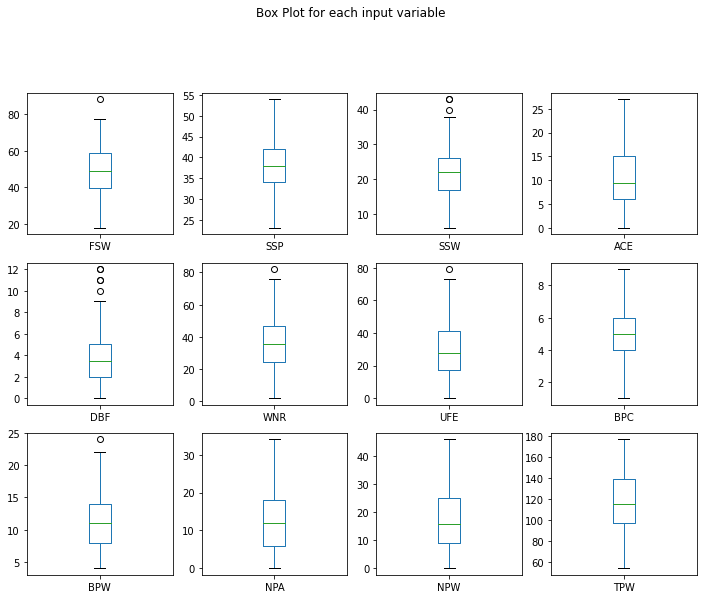

In [68]:
clean_result.drop('FSP', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12), 
                                        title='Box Plot for each input variable')
plt.savefig('Input box without outliers')
plt.show()

Kao što se može videti primenom prethodnih algoritama, nijedan od njih ne daje efikasnost od 100%. Dosta parametara zavisi od stranih faktora kao što su povrede, predaje mečeva pri nekim rezultatima, ali zavise i od vremenskih uslova, protivnika, njegovih fizičkih predispozicija i pripremljenosti, podloge na kojoj se igra.